<a href="https://colab.research.google.com/github/ai-fast-track/timeseries/blob/master/nbs/cam_tutorial_ECG200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial - 2: Model Interpretation for ECG200 Dataset
> Predictin a test dataset for the ECG200 univariate time series dataset using an exported model

In [ ]:
import sys
import os
ISCOLAB = 'google.colab' in sys.modules
if ISCOLAB:
    if not os.path.isdir('/content/timeseriesAI2'):
        !pip install git+https://github.com/fastai/fastai2 
        !pip install git+https://github.com/fastai/fastcore 
        !pip install git+https://github.com/ai-fast-track/timeseries.git

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [ ]:
from fastai2.basics import *

In [ ]:
# hide
# Only for Windows users because symlink to `timeseries` folder is not recognized by Windows
import sys
sys.path.append("..")

In [ ]:
from timeseries.all import *

In [ ]:
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display

# Inference Tutorial
> Test inference (predictions)


## ECG Dataset
> This dataset was formatted by R. Olszewski as part of his thesis
“Generalized feature extraction for structural	pattern recognition
in time-series data,” at Carnegie Mellon University, 2001. Each
series traces the electrical activity recorded during one
heartbeat. The two classes are a normal heartbeat and a Myocardial
Infarction. Cardiac ischemia refers to lack of blood flow and oxygen to the heart muscle. If ischemia is severe or lasts too long, it can cause a heart attack (myocardial infarction) and can lead to heart tissue death. 	

![](images/ECG200.png)

In [ ]:
widgets.IntSlider()

IntSlider(value=0)

In [ ]:
def f(x):
    return x

In [ ]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

10

In [ ]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

## Importing a model

In [ ]:
path = Path()
path.ls(file_exts='.pkl'), path
learn = load_learner(path/'export.pkl')
dls = learn.dls

In [ ]:
# fname = Path('.')/'timeseries/data/ECG200_sample.arff'
fname = Path('.')/'timeseries/data/ECG200_TEST.arff'
fname

Path('timeseries/data/ECG200_TEST.arff')

In [ ]:
data = TSData.from_arff([fname])
data

TSData:
 Datasets names (concatenated): ['ECG200_TEST']
 Filenames:                     [Path('timeseries/data/ECG200_TEST.arff')]
 Data shape: (100, 1, 96)
 Targets shape: (100,)
 Nb Samples: 100
 Nb Channels:           1
 Sequence Length: 96

In [ ]:
items_test = data.sample(4)
# items_test

In [ ]:
# len(items_test)

In [ ]:
# test_dl = dls.test_dl(dls.valid_ds.items[:4], with_labels=True)
test_dl = dls.test_dl(items_test, with_labels=True)

In [ ]:
len( test_dl.dataset)

4

In [ ]:
len(test_dl.dataset), test_dl.dataset[3]

(4,
 (TensorTS([[ 0.3092,  1.3356,  2.9714,  4.1106,  2.5900,  0.5959, -0.9086, -0.9524,
            0.3843,  0.4965,  0.1888, -0.0181, -0.0358, -0.0438, -0.4756, -0.5946,
           -0.6820, -0.8005, -0.7099, -1.1346, -1.0809, -0.9087, -0.9752, -1.3945,
           -1.4814, -0.8521, -1.5161, -1.9550, -1.5997, -1.5093, -1.8025, -1.5527,
           -1.3713, -1.6380, -1.2486, -0.7595, -0.7484, -0.3949, -0.0670,  0.0695,
            0.5627,  0.5353,  0.4761,  1.2288,  1.0895,  0.9232,  1.1174,  0.8957,
            1.0062,  0.9527,  0.8384,  0.9831,  0.6431,  0.7413,  1.1020,  0.4761,
            0.3242,  1.0115,  0.8521,  0.4591,  0.5291,  0.6703,  0.5135,  0.6511,
            0.5136,  0.0964,  0.5022,  0.4846,  0.2292,  0.1252, -0.0670,  0.1515,
            0.2030,  0.2986,  0.7296,  0.4129,  0.3309,  0.6864,  0.0494,  0.1763,
           -0.0914, -0.6511,  0.0983, -0.7006, -0.1853, -0.1893, -0.7420, -0.6169,
           -0.5167, -0.3290, -0.4212, -0.5863, -0.9538, -0.4180, -0.2288, -0.8131

In [ ]:
dls.vocab 

(#2) ['-1','1']

In [ ]:
# i2o() function
# Converting CategoryTensor label into the human-readable label
lbl_dict = dict([
    (0, 'Normal'),   
    (1, 'Myocardial Infarction')]
)
def i2o(y):
    return lbl_dict.__getitem__(y.data.item())
    # return lbl_dict.__getitem__(int(dls.tfms[1][1].decodes(y)))

In [ ]:
preds = learn.get_preds(dl=test_dl)  
preds

(tensor([[0.1124, 0.8876],
         [0.3614, 0.6386],
         [0.1107, 0.8893],
         [0.1702, 0.8298]]), tensor([1, 1, 1, 1]))

In [ ]:
preds[1]

tensor([1, 1, 1, 1])

In [ ]:
confidence = []
for index, item in enumerate(preds[0]): 
	prediction = dls.categorize.decode(np.argmax(item)).upper() 
	val = float(max(item))*100
	percent = f'Confidence: {val:.2f}%'
	confidence.append(percent)
	print(f"Prediction: {prediction} - Confidence: {percent} - tserie = {test_dl.items[index][1]}")


Prediction: 1 - Confidence: Confidence: 88.76% - tserie = 1
Prediction: 1 - Confidence: Confidence: 63.86% - tserie = 1
Prediction: 1 - Confidence: Confidence: 88.93% - tserie = 1
Prediction: 1 - Confidence: Confidence: 82.98% - tserie = 1


In [ ]:
confidence

['Confidence: 88.76%',
 'Confidence: 63.86%',
 'Confidence: 88.93%',
 'Confidence: 82.98%']

In [ ]:
test_dl.bs = len( test_dl.dataset)
batch=test_dl.one_batch()
# test_dl.bs, batch

In [ ]:
from timeseries.all import *

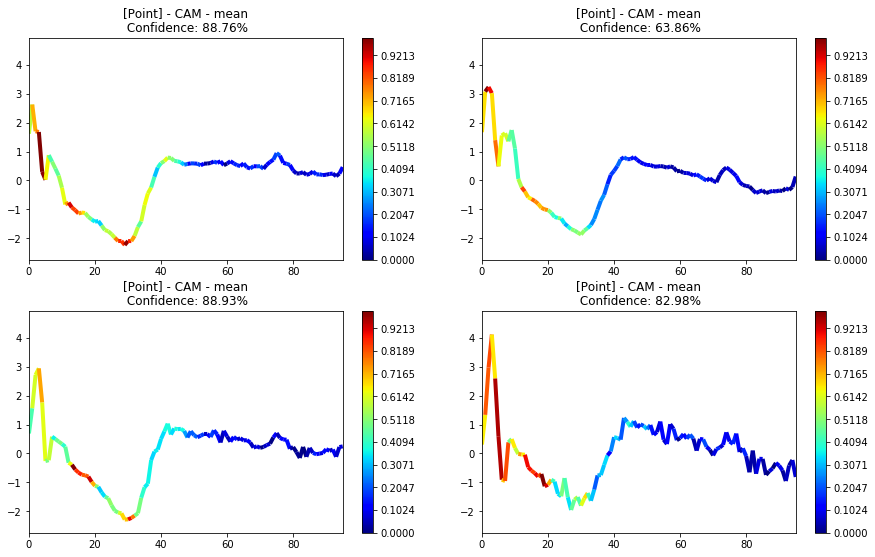

<Figure size 432x288 with 0 Axes>

In [ ]:
show_cam(batch, learn.model, layer=5, i2o=i2o, multi_fig=True, cmap=CMAP.jet, confidence=confidence, figsize=(13,8), savefig='figure1.png') # default: func_cam=cam_acts, figsize=(13,4), 

In [ ]:
learn_inf.dls.loaders.append(test_dl)

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn_inf, ds_idx=0)
# interp.plot_confusion_matrix()

![](images/montreal-pont-jacques-cartier.jpg)
